# Week 2 Lecture

# Award Winning Movies and Revenue

Do movies that win academy awards usually earn more than movies that don't win an academy award?

## Data

- We will use data from wikipedia
- A table of highest grossing films is <https://en.wikipedia.org/wiki/List_of_highest-grossing_films>
- A table of academy award winning films is <https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films>

## Python to analyze data

- We will use Python to analyze the data in the tables

- First let's start with boxoffice revenue for highest grossing films



## Scraping Data from a Webpage

- Webpages often contain numerical and non-numerical data that can be used to answer questions.
- But webpages are written using html, css, and javascript.

![](images/wikipedia_screenshot.png)

## HTML Tables

- HTML (HyperText Markup Language) is the standard markup language that defines the structure and meaning of content on web pages for display in a browser.

- HTML tables are a way to mark up tabular data (information with rows and columns) on web pages.

- The core container is the `<table>` element, which represents data with “more than one dimension,” arranged as a grid of rows, columns, and cells.
A typical table is built from:

   - `<tr>` for each row
   - `<th>` for header cells (column/row headings)
   - `<td>` for data cells

Data on three (fictitous) students in an html table is below.

<table>
  <thead>
    <tr>
      <th>Student first name</th>
      <th>Favourite artist</th>
      <th>Number of streams per week</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Ava</td>
      <td>Taylor Swift</td>
      <td>120</td>
    </tr>
    <tr>
      <td>Leo</td>
      <td>Kendrick Lamar</td>
      <td>85</td>
    </tr>
    <tr>
      <td>Maya</td>
      <td>Beyoncé</td>
      <td>140</td>
    </tr>
  </tbody>
</table>

The HTML that produced this table is

```html
<table>
  <thead>
    <tr>
      <th>Student first name</th>
      <th>Favourite artist</th>
      <th>Number of streams per week</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Ava</td>
      <td>Taylor Swift</td>
      <td>120</td>
    </tr>
    <tr>
      <td>Leo</td>
      <td>Kendrick Lamar</td>
      <td>85</td>
    </tr>
    <tr>
      <td>Maya</td>
      <td>Beyoncé</td>
      <td>140</td>
    </tr>
  </tbody>
</table>
```


## Import the HTML Table into a Python Data Structure

One way to do it is to use the [BeautifulSoup library](https://beautiful-soup-4.readthedocs.io/en/latest/) — a Python library for pulling data out of HTML (and XML) files.

### Step 1 - Put HTML in Python string

In [151]:
# BeautifulSoup parses HTML into a tree of Tag objects so we can search/navigate it.
from bs4 import BeautifulSoup

# 1) Put your HTML table into a Python string.

html_tbl = """
<table>
  <thead>
    <tr>
      <th>Student first name</th>
      <th>Favourite artist</th>
      <th>Number of streams per week</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>Ava</td><td>Taylor Swift</td><td>120</td></tr>
    <tr><td>Leo</td><td>Kendrick Lamar</td><td>85</td></tr>
    <tr><td>Maya</td><td>Beyoncé</td><td>140</td></tr>
  </tbody>
</table>
"""

### Step 2 - Parse the HTML text



In [152]:
# 2) Parse the HTML text.
#    "html.parser" uses Python's built-in HTML parser - a structured representation of the table text
soup = BeautifulSoup(html_tbl, "html.parser")

# checkout the type of object it returns
#type(soup)

### Step 3 - find all the tables in HTML text

In [153]:
# 3) Locate the first <table> element.
#    If your HTML has multiple tables, you can narrow this by id/class attributes.
table = soup.find("table")

### Step 4 - locate column headers using `<th>` tag

In [154]:
# 4) Extract column headers from <th> cells.
#    - find_all("th") returns all header tags
#    - get_text(strip=True) extracts just the text and trims whitespace :contentReference[oaicite:2]{index=2}
# review list comprehension if this doesn't look familiar

headers = [th.get_text(strip=True) for th in table.find_all("th")]

## Step 5 - Iterate over each row and collect data to store in a dictionary

In [155]:
# 5) Walk over each table row (<tr>) and collect the data cells (<td>).
#    NB: table.find_all("tr") returns ALL rows including the header row.
rows_as_dicts = []

for tr in table.find_all("tr"):
    # Grab the data cells in this row
    tds = tr.find_all("td")

    # Skip rows that have no <td> cells (e.g., the header row typically has <th> only)
    if not tds:
        continue

    # Extract cleaned text from each <td>
    values = [td.get_text(strip=True) for td in tds]
    
    # Pair headers with values to make a dictionary for this row
    # zip creates an iterator of header, value pairs 
    # (e.g., ('Student first name', 'Ava'), ('Favourite artist', 'Taylor Swift'),
    # ('Number of streams per week': '120')
    row = dict(zip(headers, values))
    
    # 6) convert numeric columns from strings to integers
    streams_key = "Number of streams per week"
    if streams_key in row:
        row[streams_key] = int(row[streams_key])

    rows_as_dicts.append(row)

# rows_as_dicts is now a plain Python data structure: list of dicts
rows_as_dicts

[{'Student first name': 'Ava',
  'Favourite artist': 'Taylor Swift',
  'Number of streams per week': 120},
 {'Student first name': 'Leo',
  'Favourite artist': 'Kendrick Lamar',
  'Number of streams per week': 85},
 {'Student first name': 'Maya',
  'Favourite artist': 'Beyoncé',
  'Number of streams per week': 140}]

### Step 6 - Compute the average number of streams

In [156]:
streams = [row["Number of streams per week"] for row in rows_as_dicts]

avg_streams = sum(streams) / len(streams) 

print(f'The average number of streams is {avg_streams}.')

The average number of streams is 115.0.


## Use `pandas.read_html()`

In [157]:
import pandas as pd
from io import StringIO

my_tbl = pd.read_html(StringIO(html_tbl))

# returns a list of tables 
print(my_tbl)
type(my_tbl)

[  Student first name Favourite artist  Number of streams per week
0                Ava     Taylor Swift                         120
1                Leo   Kendrick Lamar                          85
2               Maya          Beyoncé                         140]


list

## Compute the average number of streams using `pandas`

In [158]:
my_tbl[0]['Number of streams per week'].mean()

np.float64(115.0)

## `requests` library

- Helps Python code talk to websites and online services.
  
- Python library that can be used in Python programs to ask (`get`), send (`post`) information to a website, and assess the response it gets back from the website.

- See <https://requests.readthedocs.io/en/latest/#>

### Boxoffice Data (Highest Grossing Films) and Oscars Data from Wikipedia

In [159]:
# this code sets up the request to the website
import requests

BOXOFFICE_URL = "https://en.wikipedia.org/wiki/List_of_highest-grossing_films"
OSCARS_URL    = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"

# extra notes attched to request that inlcudes who I am, what type of info I'm sending 
HEADERS = {
    "User-Agent": "sta272-class-project/1.0 (contact: nathan.taback@utoronto.ca)",
    "Accept-Language": "en-US,en;q=0.9",
}

### `get` Box office data

In [160]:
boxoffice_request = requests.get(BOXOFFICE_URL, headers=HEADERS, timeout=30)  # requests data from the url

if boxoffice_request.ok:  # True for 200–399
    print("Response OK:", boxoffice_request.status_code)
else:
    print("Request failed:", boxoffice_request.status_code)

Response OK: 200


### `get` Oscar Winers data

In [161]:
oscars_request = requests.get(OSCARS_URL, headers=HEADERS, timeout=30)  # requests data from the url

## Import Box office and Oscars data into pandas dataframes

In [162]:
import pandas as pd
from io import StringIO

box_tables = pd.read_html(StringIO(boxoffice_request.text))
osc_tables = pd.read_html(StringIO(oscars_request.text))

box = box_tables[0]
osc = osc_tables[0]

print(box.head(), '\n') 
print(osc.head())

   Rank Peak                     Title   Worldwide gross  Year          Ref
0     1    1                    Avatar    $2,923,710,708  2009   [# 1][# 2]
1     2    1         Avengers: Endgame    $2,797,501,328  2019   [# 3][# 4]
2     3    3  Avatar: The Way of Water    $2,334,484,620  2022   [# 5][# 6]
3     4    1                   Titanic   T$2,257,906,828  1997   [# 7][# 8]
4     5    5                  Ne Zha 2  NZ$2,215,690,000  2025  [# 9][# 10] 

             Film  Year Awards Nominations
0           Anora  2024      5           6
1   The Brutalist  2024      3          10
2    Emilia Pérez  2024      2          13
3          Wicked  2024      2          10
4  Dune: Part Two  2024      2           5


## Merging Dataframes

- To investigate relationships between boxoffice revenue and awards we will *merge* `box` and `osc`.
- `DataFrame.merge` combines two pandas DataFrames by matching values in one or more key columns.
- Consider these two fictituous dataframes.

In [163]:
import pandas as pd

# df1: 2 rows
df1 = pd.DataFrame({
    "id": [1, 2],
    "name": ["Alice", "Bob"]
})

# df2: 3 rows (note id=3 doesn't exist in df1)
df2 = pd.DataFrame({
    "id": [1, 2, 3],
    "score": [90, 85, 70]
})

# Inner join: only ids that appear in BOTH
inner = df1.merge(df2, on="id", how="inner")

# Left join: keep all rows from df1, bring matching scores from df2
left = df1.merge(df2, on="id", how="left")

# Outer join: keep all ids from both (missing values become NaN)
outer = df1.merge(df2, on="id", how="outer")

print("df1:\n", df1, "\n")
print("df2:\n", df2, "\n")

print("inner:\n", inner, "\n")
print("left:\n", left, "\n")
print("outer:\n", outer, "\n")


df1:
    id   name
0   1  Alice
1   2    Bob 

df2:
    id  score
0   1     90
1   2     85
2   3     70 

inner:
    id   name  score
0   1  Alice     90
1   2    Bob     85 

left:
    id   name  score
0   1  Alice     90
1   2    Bob     85 

outer:
    id   name  score
0   1  Alice     90
1   2    Bob     85
2   3    NaN     70 



## `merge` `box` and `osc`

In [164]:
box.merge(osc, how = 'left', left_on = ['Title', 'Year'], right_on = ['Film','Year'])

ValueError: You are trying to merge on int64 and object columns for key 'Year'. If you wish to proceed you should use pd.concat

In [165]:
print('Column types for box: ','\n', box.dtypes, '\n')

print('Column types for osc: ','\n', osc.dtypes)

Column types for box:  
 Rank                int64
Peak               object
Title              object
Worldwide gross    object
Year                int64
Ref                object
dtype: object 

Column types for osc:  
 Film           object
Year           object
Awards         object
Nominations    object
dtype: object


- Year has type `int` in `box` and type `object` in `osc`.
- Let's try converting to `int`.

In [166]:
osc['Year'].astype('int')

ValueError: invalid literal for int() with base 10: '2020/21'

## Regular expressions

- Some values of `osc[Year]` are `'2020/21'`
- Let's drop the characters afte the string `'/'`
- we can use the `pandas` method `str.extract` with a *regular expression (regex)* 
- a regular expression is a small pattern language for matching text
- `\d` is a digit (0-9) and `{4}` is exactly 4 times
- we combine these into the regular expression `\d{4}`
- in Python (and `pandas`) when we add `r` in front of the string to indicate raw string and don't treat `\` as a special character.

In [167]:
osc['Year'].astype(str).str.extract(r'(\d{4})', expand=False)

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
1382    1943
1383    1946
1384    1964
1385    1938
1386    1964
Name: Year, Length: 1387, dtype: object

`osc['Year'].astype(str).str.extract(r'(\d{4})', expand=False)` is an example of calling methods in a chain

1. `osc["Year"]` → a Series
2. `.astype(str)` → convert values to strings
3. `.str.extract(...)` → run a regex extraction on each string value in the Series

- Now let's convert it to an `int` modify the `osc` dataframe by adding one more methods to the end of the pandas chain.
- See Method Chaining on this [`pandas` cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- Modify `osc` column `Year` by assigning it the transformed column.

In [168]:
# add new Year variable to dataframe

osc['Year'] = osc['Year'].astype(str).str.extract(r'(\d{4})', expand=False).astype('int')

In [217]:
# now merge box and osc

merged = box.merge(osc, how = 'left', left_on = ['Title', 'Year'], right_on = ['Film', 'Year'])

merged['Worldwide gross'][27]

'F8$1,238,764,765'

## Using regular expresions to tidy data

- I want to compute some basic statistics with `Worldwide gross` but it's not an integer.  How can I change it to an `int`?

In [218]:
merged['Worldwide gross'].head()

0      $2,923,710,708
1      $2,797,501,328
2      $2,334,484,620
3     T$2,257,906,828
4    NZ$2,215,690,000
Name: Worldwide gross, dtype: object

- This requires a more complex regular expression
- Let's remove everything before the digits including`'$'` and `','`.
- The number part is 1 then ,238 then ,764 then ,765
- The regex `(?:,\d{3})+` means:

    - match a comma + exactly 3 digits
    - one or more times (`+`)
    - and `(?:...)` makes it a non-capturing group (you don’t need to capture each ,### chunk separately)

- `\d{4,}` will match 4 or more digits in a row.
- `\` means OR 

- `\d{1,3}(?:,\d{3})+|\d{4}` will match the whole comma-formatted number

In [219]:
gross_nums = merged['Worldwide gross'].astype('str').str.extract(r'(\d{1,3}(?:,\d{3})+|\d{4,})',expand = False)

gross_nums[0:9] #first 9 rows

0    2,923,710,708
1    2,797,501,328
2    2,334,484,620
3    2,257,906,828
4    2,215,690,000
5    2,068,223,624
6    2,048,359,754
7    1,922,598,800
8    1,698,863,816
Name: Worldwide gross, dtype: object

## Remove `,` with `str.replace()`

In [220]:
# replace , with emplty string ""
gross_nums_clean = gross_nums.str.replace(",", "", regex=False).astype("Int64")

gross_nums_clean[0:9] 

0    2923710708
1    2797501328
2    2334484620
3    2257906828
4    2215690000
5    2068223624
6    2048359754
7    1922598800
8    1698863816
Name: Worldwide gross, dtype: Int64

## Create a new column in a `pandas` dataframe

- add the column `'gross_nums_clean'` to `merged`.


In [221]:
# create a new column in merged from values in gross_nums_clean

merged['gross_nums_clean'] = gross_nums_clean

merged.head()

,Rank,Peak,Title,Worldwide gross,Year,Ref,Film,Awards,Nominations,gross_nums_clean
0,1,1,Avatar,"$2,923,710,708",2009,[# 1][# 2],Avatar,3,9,2923710708
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4],NaN,NaN,NaN,2797501328
2,3,3,Avatar: The Way of Water,"$2,334,484,620",2022,[# 5][# 6],Avatar: The Way of Water,1,4,2334484620
3,4,1,Titanic,"T$2,257,906,828",1997,[# 7][# 8],Titanic,11,14,2257906828
4,5,5,Ne Zha 2,"NZ$2,215,690,000",2025,[# 9][# 10],NaN,NaN,NaN,2215690000


## Create a new column in a `pandas` dataframe using if-then

- There are several ways to do this.
- One option is to use `DataFrame.where()`.
  
```python
df.where(cond, other) 
```

replace values in `df` where the `cond` is False.  

There are several other ways to do this.

In [223]:
merged['Awards_nomiss'] = merged['Awards'].where(~merged['Awards'].isna(), other = 0)

merged.head()

,Rank,Peak,Title,Worldwide gross,Year,Ref,Film,Awards,Nominations,gross_nums_clean,Awards_nomiss
0,1,1,Avatar,"$2,923,710,708",2009,[# 1][# 2],Avatar,3,9,2923710708,3
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4],NaN,NaN,NaN,2797501328,0
2,3,3,Avatar: The Way of Water,"$2,334,484,620",2022,[# 5][# 6],Avatar: The Way of Water,1,4,2334484620,1
3,4,1,Titanic,"T$2,257,906,828",1997,[# 7][# 8],Titanic,11,14,2257906828,11
4,5,5,Ne Zha 2,"NZ$2,215,690,000",2025,[# 9][# 10],NaN,NaN,NaN,2215690000,0


- For computational purposes it's useful to replace missing values (`NaN`) with `0` in the `Awards` column of `merged`.
- `merged['Awards'].isna()` → True where Awards is missing (`NaN`), `False` otherwise.
- `~merged['Awards'].isna()` → flips it: `True` where Awards is not missing.
- `.where(condition, other=0)` → keep the original value where condition is `True`; replace with 0 where it’s `False` (i.e., where it was missing).

## Fill in awards values that are missing with 0 using `fillna()`

In [174]:
# fill missing with 0 then convert to type int

merged['Awards'] = merged['Awards'].fillna(0).astype('int') # if missing assume no awards

merged.head()

,Rank,Peak,Title,Worldwide gross,Year,Ref,Film,Awards,Nominations,gross_nums_clean
0,1,1,Avatar,"$2,923,710,708",2009,[# 1][# 2],Avatar,3,9,2923710708
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4],NaN,0,NaN,2797501328
2,3,3,Avatar: The Way of Water,"$2,334,484,620",2022,[# 5][# 6],Avatar: The Way of Water,1,4,2334484620
3,4,1,Titanic,"T$2,257,906,828",1997,[# 7][# 8],Titanic,11,14,2257906828
4,5,5,Ne Zha 2,"NZ$2,215,690,000",2025,[# 9][# 10],NaN,0,NaN,2215690000


## Do films that win an award have higher revenues?

- Compare gross revenue for films with no awards versus at least one award
- Let's examine the distribution of revenue for films that won at least one Oscar compared to films that won no Oscar.

## Summarizing data using `groupby`

`groupby` in pandas splits your data into groups based on one or more columns, applies an operation to each group (like sum/mean/count), and returns the combined result.

In [17]:
import pandas as pd

# create a a copy of df to prevent accidental changes to merged data
df = merged.copy()

# create a variable that records number of oscar wins 
# use fillna to replace missing with 0 

df["oscar_wins"] = pd.to_numeric(df["Awards"], errors="coerce").fillna(0).astype(int)

# create a Boolean variable that indicates if a film won

df["won_oscar"] = df["Awards"] >= 1

df.head()

,Rank,Peak,Title,Worldwide gross,Year,Ref,Film,Awards,Nominations,gross_nums_clean,oscar_wins,won_oscar
0,1,1,Avatar,"$2,923,710,708",2009,[# 1][# 2],Avatar,3,9,2923710708,3,True
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4],NaN,0,NaN,2797501328,0,False
2,3,3,Avatar: The Way of Water,"$2,334,484,620",2022,[# 5][# 6],Avatar: The Way of Water,1,4,2334484620,1,True
3,4,1,Titanic,"T$2,257,906,828",1997,[# 7][# 8],Titanic,11,14,2257906828,11,True
4,5,5,Ne Zha 2,"NZ$2,215,690,000",2025,[# 9][# 10],NaN,0,NaN,2215690000,0,False


## `groupby()`

In [22]:
df.groupby("won_oscar")["gross_nums_clean"].agg(num_movies="count", avg_gross="mean", median_gross="median")

,num_movies,avg_gross,median_gross
won_oscar,,,
False,37,1401694674.189189,1263521126.0
True,13,1510293283.384615,1290000000.0


- `df.groupby("won_oscar")["gross_nums_clean"]` means:

   * `df.groupby("won_oscar")`: split the rows of df into groups based on the values in the `won_oscar` column (True/False).
  
   * `["gross_nums_clean"]`: within each group, select just the gross_nums_clean column (a Series) to operate on.

- `groupby` computes statistics `count`, `mean` and `median` separately for each group.

- `.agg` computes multiple aggregations in one go and names the output columns (`n_movies`, `avg_gross`, `median_gross`)

## Plotting with `matplotlib`

### Histograms

- Create gross revenue variables of films that did and didn't win an oscar
- 

In [23]:
no_wins = df[df['won_oscar'] == False]['gross_nums_clean']

winners = df[df['won_oscar'] == True]['gross_nums_clean']


## DataFrame.plot

- `DataFrame.plot` is a convenient pandas wrapper around Matplotlib that lets you quickly make plots from columns in a DataFrame.


Text(0.5, 1.0, 'Movies with No Awards')

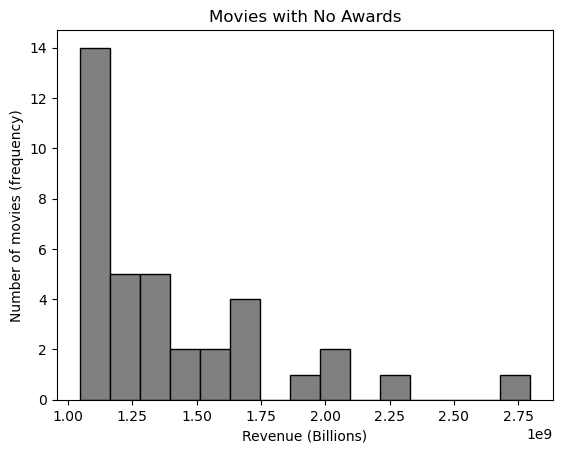

In [61]:
# histogram of movies w/out awards
# bins = 15, edgecolor = "black", color = "grey"
# number of bins is 15, bin color is grey, and line color between bins is black 

ax = no_wins.plot(kind = "hist", bins = 15, edgecolor = "black", color = "grey")
ax.set_xlabel("Revenue (Billions)")
ax.set_ylabel("Number of movies (frequency)")
ax.set_title("Movies with No Awards")

Text(0.5, 1.0, 'Movies with Awards')

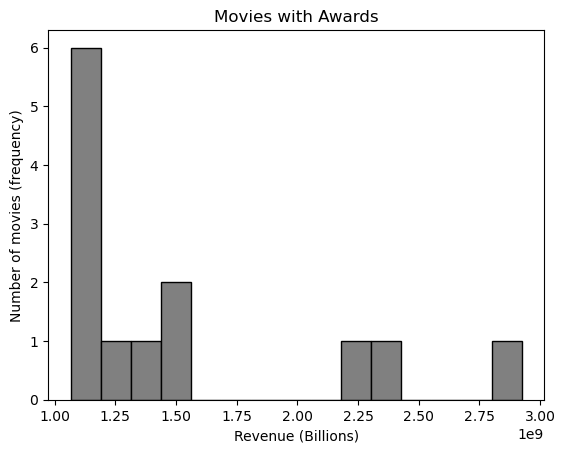

In [60]:
# histogram of movies with awards
ax = winners.plot(kind = "hist", bins=15, edgecolor = "black", color = "grey")
ax.set_xlabel("Revenue (Billions)")
ax.set_ylabel("Number of movies (frequency)")
ax.set_title("Movies with Awards")

## `matplotlib`

- Matplotlib is a Python plotting library for creating static (and some interactive) visualizations—line charts, scatter plots, histograms, bar charts, etc. — with lots of control over formatting (titles, labels, ticks, legends, styles).

- `matplotlib.pyplot` (often imported as `plt`) is Matplotlib’s plotting interface that lets you create and customize figures, axes, and common chart types (line plots, scatter, histograms, etc.). It provides functions like plt.figure(), plt.plot(), plt.scatter(), plt.hist(), plt.xlabel(), and plt.show() to build and display

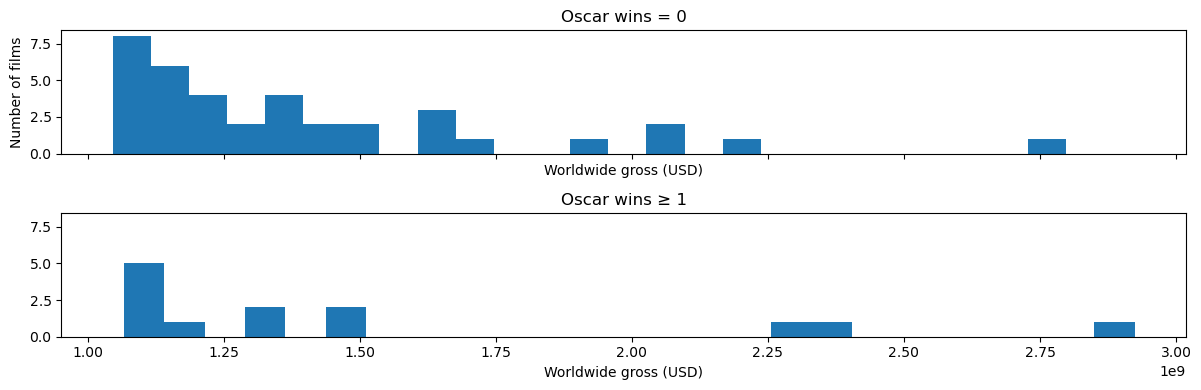

In [62]:
import matplotlib.pyplot as plt

bins = 25

fig, ax = plt.subplots(2, 1, figsize=(12, 4), sharey=True, sharex=True)

ax[0].hist(no_wins, bins=bins) # first plot 
ax[0].set_title("Oscar wins = 0")
ax[0].set_xlabel("Worldwide gross (USD)")
ax[0].set_ylabel("Number of films")

ax[1].hist(winners, bins=bins) # second plot
ax[1].set_title("Oscar wins ≥ 1")
ax[1].set_xlabel("Worldwide gross (USD)")

plt.tight_layout()
plt.show()

`fig, ax = plt.subplots(2, 1, figsize=(12, 4), sharey=True, sharex=True)`

   * Creates a Matplotlib figure (`fig`) with a grid of subplots: 2 rows × 1 column (so two plots stacked vertically).
   * `ax` is an array-like of two Axes objects (e.g., `ax[0]` and `ax[1]`) where you draw each plot.
   * `figsize=(12, 4)` sets the overall figure size in inches (width 12, height 4).
   * `sharey=True` and `sharex=True` make both subplots use the same y-axis and x-axis scales, so they’re directly comparable.
   * `plt.tight_layout()`: automatically adjusts spacing (margins, padding) between subplots so titles, axis labels, and tick labels don’t overlap or get cut off.
   * `plt.show()`: renders/displays the figure (in a notebook it outputs the plot; in a script it opens the plot window).

### Boxplots

Text(0.5, 1.0, 'Worldwide gross: Oscar non-winners vs winners')

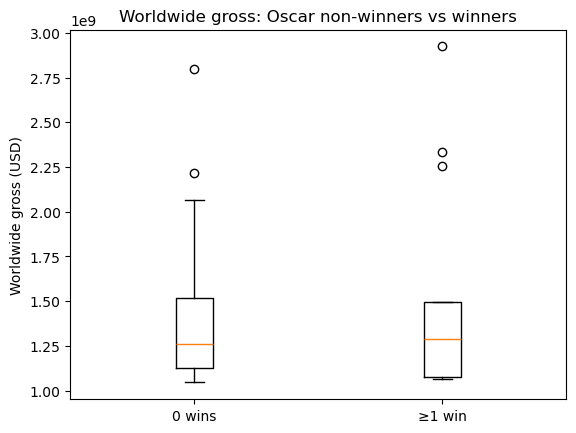

In [66]:
# draws two boxplots one for no_wins and one for winners
plt.boxplot([no_wins, winners], tick_labels=["0 wins", "≥1 win"])
plt.ylabel("Worldwide gross (USD)")
plt.title("Worldwide gross: Oscar non-winners vs winners")

### Violin plots

Text(0.5, 1.0, 'Worldwide gross: Oscar non-winners vs winners (violin)')

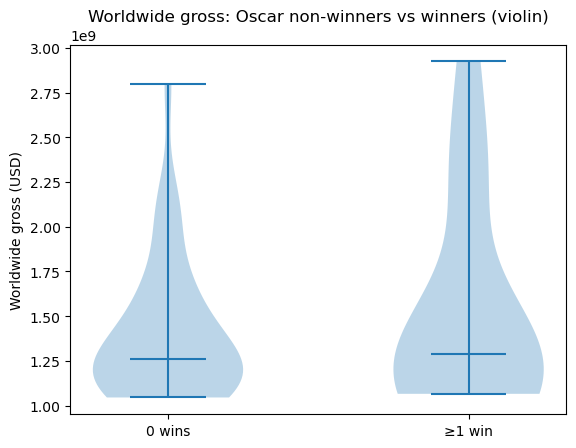

In [71]:
plt.violinplot([no_wins, winners], showmeans=False, showmedians=True, showextrema=True)
plt.xticks([1, 2], ["0 wins", "≥1 win"])
plt.ylabel("Worldwide gross (USD)")
plt.title("Worldwide gross: Oscar non-winners vs winners (violin)")

- A violin plot shows the distribution of a numeric variable for one or more groups.
- It combines a boxplot-like summary (often median and quartiles) with a mirrored density curve, so you can see both typical values and the full shape (skew, multiple peaks) of the data.

## JSON

- Java script object notation
- Popular format for storing data
- A string or text based data format. For example:

  `json_string = '{"id": 1, "title": "Welcome to my world", "text": "Hello", "top" : true}'`

- In python `json` library is often used to handle data in json format. 

In [80]:
import json

# a typical json string
json_string = '{"id": 1, "title": "Welcome to my world", "text": "Hello", "top" : [true, 1]}'

# convert json string to python dict
json_dict = json.loads(json_string)

print('json string --> Python dict:', json_dict, '\n')

# convert Python dict to json string
back_to_json_string = json.dumps(json_dict)

print('Python dict --> json string:',back_to_json_string)


json string --> Python dict: {'id': 1, 'title': 'Welcome to my world', 'text': 'Hello', 'top': [True, 1]} 

Python dict --> json string: {"id": 1, "title": "Welcome to my world", "text": "Hello", "top": [true, 1]}


## Reddit 

![](images/reddit_screenshot.png)

<https://www.reddit.com/r/UofT/top.json>

- The Reddit API (application programming interface) stores data on the site in json format.
- For example part of the json above that corresponds to this post is: 

>{"kind": "Listing", "data": {"after": "t3_1qbgadf", "dist": 25, "modhash": "r3ve59mi8xe8d442b0daed4c169287f527360c0708344aa2f8", "geo_filter": "", "children": [{"kind": "t3", "data": {"approved_at_utc": null, "subreddit": "UofT", "selftext": "[STA237 students raise concerns about minimum passing requirement for final exam \u2013 The Varsity](https://thevarsity.ca/2026/01/11/sta237-students-raise-concerns-about-minimum-passing-requirement-for-final-exam/)\n\n  \n\"Roughly one-third of students failed, assuming a normal, symmetrical distribution of grades\"\n\n\"Karen Huynh Wong (STA237 course instructor) declined\u00a0*The Varsity*\u2019s\u00a0interview request.\u00a0\"", "author_fullname": "t2_7pt86nnp", "saved": false, "mod_reason_title": null, "gilded": 0, "clicked": false, "title": "STA237 autofail policy got reported on VARSITY, Course instructor declined\u00a0The Varsity\u2019s\u00a0interview", "link_flair_richtext": [{"e": "text", "t": "Courses"}], "subreddit_name_prefixed": "r/UofT", "hidden":

## Importing JSON from a file

- the posts are stored in `top.json`

## `json.load()`

- reads a JSON from a file-like object into a python `dict`

In [124]:
import json

file = "top.json"

# Opens the file in read mode ("r") and decodes it as UTF-8 text (good for non-ASCII characters).
# utf-8 (ASCII is a subset) is the standard text encoding that can represent basically all Unicode characters—not just plain ASCII
# Reddit text often includes non-ASCII characters like emojis

with open(file, "r", encoding="utf-8") as f:
    listing = json.load(f)  # <- read json from a file - the whole JSON file at once

type(listing)

dict

## Exploring `top.json`

### What are the keys of the `dict`?

In [94]:
listing.keys()

dict_keys(['kind', 'data'])

In [95]:
type(listing['data'])

dict

- `listing['data']` is also a `dict`.
- what are the keys?

In [96]:
listing['data'].keys()

dict_keys(['after', 'dist', 'modhash', 'geo_filter', 'children', 'before'])

In [102]:
print(type(listing['data']['children']))
len(listing['data']['children'])

<class 'list'>


25

What's type is the first object in `listing['data']['children']`?

In [98]:
type(listing['data']['children'][0])

dict

In [99]:
listing['data']['children'][0].keys()

dict_keys(['kind', 'data'])

In [100]:
type(listing['data']['children'][0]['data'])

dict

In [93]:
listing['data']['children'][0]['data'].keys()

dict_keys(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'is_created_from_ads_ui', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_u

In [109]:
# title of post
print('title:', listing['data']['children'][0]['data'].get("title"), '\n')

# text of post
print('text:', listing['data']['children'][0]['data'].get("selftext"))

title: STA237 autofail policy got reported on VARSITY, Course instructor declined The Varsity’s interview 

text: [STA237 students raise concerns about minimum passing requirement for final exam – The Varsity](https://thevarsity.ca/2026/01/11/sta237-students-raise-concerns-about-minimum-passing-requirement-for-final-exam/)

  
"Roughly one-third of students failed, assuming a normal, symmetrical distribution of grades"

"Karen Huynh Wong (STA237 course instructor) declined *The Varsity*’s interview request. "


## Store Reddit posts in a `list` using a `for` loop

- Loop through each Reddit post in `listing["data"]["children"]`, pulls out the post’s `title` and `selftext`, and removes extra whitespace.
  
- Combine `title` + `selftext` into one “document” string and appends it to a list, skipping any empty documents.

In [110]:

# Creates an empty list that will hold one text “document” per Reddit post.
docs = []

# Loops over each item in the Reddit listing. In Reddit’s JSON, posts are stored under ["data"]["children"]
for child in listing["data"]["children"]:
    #Each child wrapper contains metadata like kind plus the actual post fields inside child["data"]
    post = child["data"]  # <- actual post fields live here

    # returns the title/text or None if missing. .strip() removes leading/trailing whitespace
    # or turns None into empty string
    
    title = (post.get("title") or "").strip()
    text  = (post.get("selftext") or "").strip()
    
    #Combines title + body into one string, separated by a newline.
    doc = (title + "\n" + text).strip()
    # check that doc is not empty
    if doc:
        # adds document string to list
        docs.append(doc)

print("num docs:", len(docs))
print("first doc preview:\n", docs[0][:500])


num docs: 25
first doc preview:
 STA237 autofail policy got reported on VARSITY, Course instructor declined The Varsity’s interview
[STA237 students raise concerns about minimum passing requirement for final exam – The Varsity](https://thevarsity.ca/2026/01/11/sta237-students-raise-concerns-about-minimum-passing-requirement-for-final-exam/)

  
"Roughly one-third of students failed, assuming a normal, symmetrical distribution of grades"

"Karen Huynh Wong (STA237 course instructor) declined *The Varsity*’s interview request. "


## Store Reddit posts in a `pandas` dataframe

- `pd.json_normalize` takes nested JSON (dicts/lists inside dicts/lists) and flattens it into a table (a DataFrame), so each post becomes a row and nested keys become columns like `data.title`, `data.selftext`, etc.

In [130]:
# read in file

file = "top.json"
with open(file, "r", encoding="utf-8") as f:
    listing = json.load(f)   # top-level dict: kind + data

# Flatten the list of children into columns like "data.title", "data.selftext", etc.
posts_df = pd.json_normalize(listing["data"]["children"])

print(posts_df.shape)
posts_df.columns

(25, 101)


Index(['kind', 'data.approved_at_utc', 'data.subreddit', 'data.selftext',
       'data.author_fullname', 'data.saved', 'data.mod_reason_title',
       'data.gilded', 'data.clicked', 'data.title',
       ...
       'data.author_patreon_flair', 'data.author_flair_text_color',
       'data.permalink', 'data.stickied', 'data.url',
       'data.subreddit_subscribers', 'data.created_utc', 'data.num_crossposts',
       'data.media', 'data.is_video'],
      dtype='object', length=101)

## `for` loop iteration compared to `pandas` approach

- `for` loop is clearest when JSON is nested or irregular and it's easy to add custom logic.
- `pd.json_normalize(listing["data"]["children"])` is still iterating *under the hood* .
-  If you’re just extracting a couple fields and building a list for sklearn, the for-loop is perfectly fine (often simplest).
-  If you want to do lots of filtering/joins/groupby/EDA afterward, pandas can be worth it because it puts everything into columns early.

## Compare a post's score to number of words in post

- A post's score is approximately number of upvotes minus number of downvotes
- Does the length of a post influcence the post's score?

In [135]:
posts_df['post_text'] = (posts_df["data.title"].fillna("") + " " + posts_df["data.selftext"].fillna("")).str.strip()

posts_df['post_text_count'] = posts_df['post_text'].str.split().str.len()

Text(0.5, 1.0, 'Top r/UofT posts Word Count vs. Score')

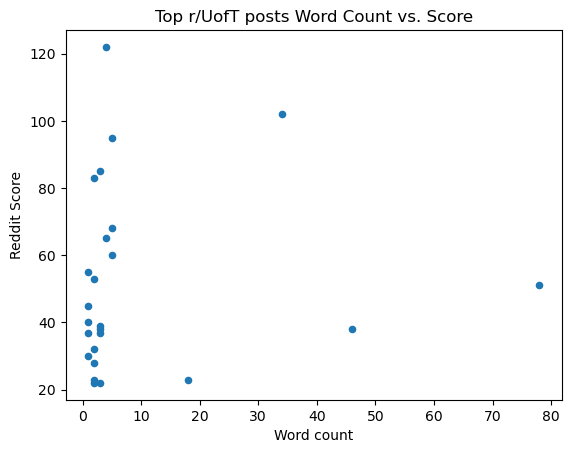

In [150]:
ax = posts_df.plot(kind='scatter', y = 'post_text_count', x = 'data.score')
ax.set_ylabel("Reddit Score")
ax.set_xlabel("Word count")
ax.set_title("Top r/UofT posts Word Count vs. Score")